In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2

2024-05-01 11:37:45.857709: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 11:37:45.862044: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 11:37:45.912738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 11:37:46.782925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:

# # Load the saved model
# model = load_model("/home/codezeros/Documents/Emotion Detection/emotion_model.h5")

# # Load the image
# img = image.load_img("/home/codezeros/Documents/Emotion Detection/p.jpg", target_size=(48, 48), color_mode="grayscale")
# img_array = np.array(img)

# # Ensure the input image has the correct shape
# if img_array.shape != (48,48):
#     raise ValueError("Input image should be of size (48, 48)")

# # Reshape and preprocess the image
# img = np.expand_dims(img_array, axis=0)
# img = img.astype('float32') / 255  # Normalize pixel values to [0, 1]

# # Perform prediction
# result = model.predict(img)
# result = list(result[0])

# # Get the predicted label
# img_index = result.index(max(result))
# label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
# predicted_label = label_dict[img_index]

# # Display the image
# plt.imshow(img_array, cmap='gray')
# plt.title("Predicted emotion: " + predicted_label)
# plt.axis('off')
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


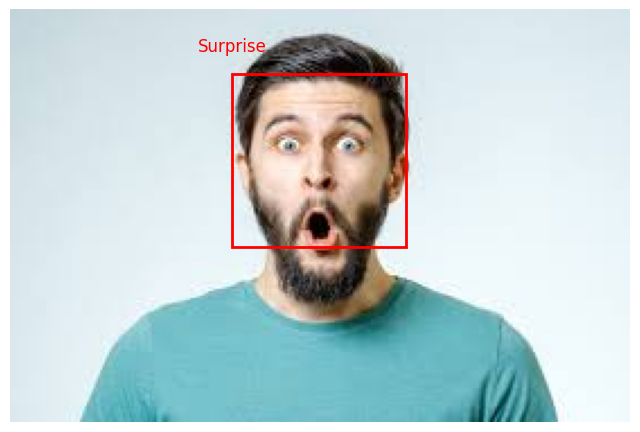

In [4]:
# Load the saved model
model = load_model("/home/codezeros/Pictures/Emotion Detection/emotion_model.h5")

# Load the image
img = cv2.imread("/home/codezeros/Pictures/Emotion Detection/surprise.jpeg")
# # Convert BGR image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascades classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Ensure at least one face is detected
if len(faces) == 0:
    print("No human detected in the image.")
else:
    # Define the emotion labels
    label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

    # Display the image with face rectangles and predicted emotion label
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    ax = plt.gca()

    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Extract the face region and resize for emotion detection
        face_region = gray[y:y+h, x:x+w]
        face_region_resized = cv2.resize(face_region, (48, 48))

        # Preprocess the face region for prediction
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=-1)
        face_region_resized = face_region_resized.astype('float32') / 255  

        # Perform emotion prediction
        result = model.predict(face_region_resized)
        predicted_emotion_index = np.argmax(result)
        predicted_emotion_label = label_dict[predicted_emotion_index]

        # Add predicted emotion label text
        ax.text(x, y-10, predicted_emotion_label, fontsize=12, color='r', ha='center')

    # Remove axis ticks
    ax.axis('off')

    # Show the plot
    plt.show()


## folder data check

In [ ]:
# import os

# # Path to the folder containing images
# image_folder = "/home/codezeros/Documents/Emotion Detection/images"

# # Load the saved model
# model = load_model("/home/codezeros/Documents/Emotion Detection/emotion_model.h5")

# # Loop over each image in the folder
# for filename in os.listdir(image_folder):
#     if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
#         # Load the image
#         img = cv2.imread(os.path.join(image_folder, filename))

#         # Convert BGR image to RGB format
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         # Convert the image to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#         # Detect faces in the image
#         faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#         # Ensure at least one face is detected
#         if len(faces) == 0:
#             print(f"No human detected in {filename}.")
#         else:
#             # Display the image with face rectangles and predicted emotion label
#             plt.figure(figsize=(8, 6))
#             plt.imshow(img_rgb)
#             ax = plt.gca()

#             for (x, y, w, h) in faces:
#                 # Draw rectangle around each detected face
#                 rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
#                 ax.add_patch(rect)

#                 # Extract the face region and resize for emotion detection
#                 face_region = gray[y:y+h, x:x+w]
#                 face_region_resized = cv2.resize(face_region, (48, 48))

#                 # Preprocess the face region for prediction
#                 face_region_resized = np.expand_dims(face_region_resized, axis=0)
#                 face_region_resized = np.expand_dims(face_region_resized, axis=-1)
#                 face_region_resized = face_region_resized.astype('float32') / 255  

#                 # Perform emotion prediction
#                 result = model.predict(face_region_resized)
#                 predicted_emotion_index = np.argmax(result)
#                 predicted_emotion_label = label_dict[predicted_emotion_index]

#                 # Add predicted emotion label text
#                 ax.text(x, y-10, predicted_emotion_label, fontsize=12, color='r', ha='center')

#             # Remove axis ticks
#             ax.axis('off')

#             # Show the plot
#             plt.title(f"Emotion Detection: {filename}")
#             plt.show()


## video data

In [4]:
# Load the pre-trained emotion detection model
model = load_model("/home/codezeros/Pictures/Emotion Detection/emotion_model.h5")

# Load the video
video_path = "/home/codezeros/Documents/Emotion Detection/83863-584870628_large.mp4"
cap = cv2.VideoCapture(video_path)

# Load the Haar Cascades classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the emotion labels
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

save_dir = "/home/codezeros/Documents/Emotion Detection/output/Vedio"
frame_count = 0  # Counter for frame filenames

# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Adjust codec if needed (e.g., 'MJPG')
# out = cv2.VideoWriter('output_with_emotions.avi', fourcc, 20.0, (frame.shape[1], frame.shape[0]))  # Set video dimensions


while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face region and resize for emotion detection
        face_region = gray[y:y+h, x:x+w]
        face_region_resized = cv2.resize(face_region, (48, 48))

        # Preprocess the face region for prediction
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=-1)
        face_region_resized = face_region_resized.astype('float32') / 255  

        # Perform emotion prediction
        result = model.predict(face_region_resized)
        predicted_emotion_index = np.argmax(result)
        predicted_emotion_label = label_dict[predicted_emotion_index]

        # Add predicted emotion label text
        cv2.putText(frame, predicted_emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # Save the frame with detected face and emotion label
        frame_filename = f"{save_dir}/frame_{frame_count}_{predicted_emotion_label}.jpg"
        cv2.imwrite(frame_filename, frame)
        frame_count += 1  # Increment frame counter

        # out.write(frame)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Press 'q' to exit the video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread (0x923c4a0).
Cannot move to target thread (0x8c20070)

QObject::moveToThread: Current thread (0x8c20070) is not the object's thread

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

## multiple faces are one frame

In [11]:
# # Load the saved model
# model = load_model("/home/codezeros/Documents/Emotion Detection/emotion_model.h5")

# # Load the image
# img = cv2.imread("/home/codezeros/Documents/Emotion Detection/f1.jpeg")

# # Convert BGR image to RGB format
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Load the Haar Cascades classifier for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Detect faces in the image
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# # Ensure at least one face is detected
# if len(faces) == 0:
#     print("No human detected in the image.")
# else:
#     # Define the emotion labels
#     label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

#     # Display the image with face rectangles and predicted emotion label
#     plt.figure(figsize=(8, 6))
#     plt.imshow(img_rgb)
#     ax = plt.gca()

#     for (x, y, w, h) in faces:
#         # Draw rectangle around each detected face
#         rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)

#         # Extract the face region and resize for emotion detection
#         face_region = gray[y:y+h, x:x+w]
#         face_region_resized = cv2.resize(face_region, (48, 48))

#         # Preprocess the face region for prediction
#         face_region_resized = np.expand_dims(face_region_resized, axis=0)
#         face_region_resized = np.expand_dims(face_region_resized, axis=-1)
#         face_region_resized = face_region_resized.astype('float32') / 255  

#         # Perform emotion prediction
#         result = model.predict(face_region_resized)
#         predicted_emotion_index = np.argmax(result)
#         predicted_emotion_label = label_dict[predicted_emotion_index]

#         # Add predicted emotion label text
#         ax.text(x, y-10, predicted_emotion_label, fontsize=12, color='r', ha='center')

#     # Remove axis ticks
#     ax.axis('off')

#     # Show the plot
#     plt.show()



# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the saved model
# model = load_model("/home/codezeros/Documents/Emotion Detection/emotion_model.h5")

# # Load the image
# img = cv2.imread("/home/codezeros/Documents/Emotion Detection/demo.jpeg")

# # Convert BGR image to RGB format
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Load the Haar Cascades classifier for face detection
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Detect faces in the image
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# # Ensure at least one face is detected
# if len(faces) == 0:
#     print("No human detected in the image.")
# else:
#     # Define the emotion labels
#     label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

#     # Display the image with face rectangles and predicted emotion label
#     plt.figure(figsize=(8, 6))
#     plt.imshow(img_rgb)
#     ax = plt.gca()

#     for (x, y, w, h) in faces:
#         # Draw rectangle around each detected face
#         rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
#         ax.add_patch(rect)

#         # Extract the face region and resize for emotion detection
#         face_region = gray[y:y+h, x:x+w]
#         face_region_resized = cv2.resize(face_region, (48, 48))

#         # Preprocess the face region for prediction
#         face_region_resized = np.expand_dims(face_region_resized, axis=0)
#         face_region_resized = np.expand_dims(face_region_resized, axis=-1)
#         face_region_resized = face_region_resized.astype('float32') / 255  

#         # Perform emotion prediction
#         result = model.predict(face_region_resized)
#         predicted_emotion_labels = [label_dict[i] for i in range(len(result[0]))]

#         # Add predicted emotion label text for each class
#         emotion_text = ", ".join([f"{label}: {prob:.2f}" for label, prob in zip(predicted_emotion_labels, result[0])])
#         ax.text(x, y-10, emotion_text, fontsize=10, color='r', ha='center')

#     # Remove axis ticks
#     ax.axis('off')

#     # Show the plot
#     plt.show()


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model("/home/codezeros/Pictures/Emotion Detection/emotion_model.h5")

# Load the image
img = cv2.imread("/home/codezeros/Documents/Emotion Detection/sad.jpg")

# Convert BGR image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascades classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Ensure at least one face is detected
if len(faces) == 0:
    print("No human detected in the image.")
else:
    # Define the emotion labels
    label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

    # Display the image with face rectangles and predicted emotion label
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    ax = plt.gca()

    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Extract the face region and resize for emotion detection
        face_region = gray[y:y+h, x:x+w]
        face_region_resized = cv2.resize(face_region, (48, 48))

        # Preprocess the face region for prediction
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=-1)
        face_region_resized = face_region_resized.astype('float32') / 255  

        # Perform emotion prediction
        result = model.predict(face_region_resized)
        
        # Get the top N predicted emotions along with their probabilities
        top_n = 3  # Change this value to get more or fewer predicted emotions
        top_n_indices = np.argsort(result[0])[::-1][:top_n]
        predicted_emotion_labels = [label_dict[i] for i in top_n_indices]
        predicted_emotion_probs = result[0][top_n_indices]

        # Add predicted emotion label text for each class
        emotion_text = ", ".join([f"{label}: {prob:.2f}" for label, prob in zip(predicted_emotion_labels, predicted_emotion_probs)])
        ax.text(x, y-10, emotion_text, fontsize=10, color='r', ha='center')

    # Remove axis ticks
    ax.axis('off')

    # Show the plot
    plt.show()


No human detected in the image.


In [ ]:

model = load_model("/home/codezeros/Pictures/Emotion Detection/emotion_model.h5")

input_video_path = "/home/codezeros/Documents/Emotion Detection/3 Emotional and Beautiful Ads to Make you Smile with Tears _ WHY & WHAT (online-video-cutter.com).mp4"

# Define the output video file path
output_video_path = "/home/codezeros/Documents/Emotion Detection/output/Vedio"

cap = cv2.VideoCapture(input_video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec if needed (e.g., 'MJPG')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (640, 360))  # Set video dimensions

if not cap.isOpened():
    print("Error: Video file not opened.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()

    if not ret or frame is None:  # Check if frame is None
        print("Error: Failed to read frame.")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face region and resize for emotion detection
        face_region = gray[y:y+h, x:x+w]
        face_region_resized = cv2.resize(face_region, (48, 48))

        # Preprocess the face region for prediction
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=-1)
        face_region_resized = face_region_resized.astype('float32') / 255  

        # Perform emotion prediction
        result = model.predict(face_region_resized)
        predicted_emotion_index = np.argmax(result)
        predicted_emotion_label = label_dict[predicted_emotion_index]

        # Add predicted emotion label text
        cv2.putText(frame, predicted_emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Press 'q' to exit the video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video writer and capture objects and close all windows
out.release()
cap.release()
cv2.destroyAllWindows()


Error: Video file not opened.


[ERROR:0@13723.380] global cap.cpp:643 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.9.0) /io/opencv/modules/videoio/src/cap_images.cpp:430: error: (-215:Assertion failed) !filename_pattern.empty() in function 'open'




: 

In [2]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained emotion detection model
model = load_model("/home/codezeros/Pictures/Emotion Detection/emotion_model.h5")

# Load the video
video_path = "/home/codezeros/Documents/Emotion Detection/3 Emotional and Beautiful Ads to Make you Smile with Tears _ WHY & WHAT (online-video-cutter.com) (1).mp4"
cap = cv2.VideoCapture(video_path)

# Load the Haar Cascades classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define the emotion labels
label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

save_dir = "/home/codezeros/Documents/Emotion Detection/output/Frame"
frame_count = 0  # Counter for frame filenames

fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Adjust codec if needed (e.g., 'MJPG')
out = cv2.VideoWriter('/home/codezeros/Documents/Emotion Detection/output/Vedio', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))  # Set video dimensions

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Draw rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the face region and resize for emotion detection
        face_region = gray[y:y+h, x:x+w]
        face_region_resized = cv2.resize(face_region, (48, 48))

        # Preprocess the face region for prediction
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=-1)
        face_region_resized = face_region_resized.astype('float32') / 255  

        # Perform emotion prediction
        result = model.predict(face_region_resized)
        predicted_emotion_index = np.argmax(result)
        predicted_emotion_label = label_dict[predicted_emotion_index]

        # Add predicted emotion label text
        cv2.putText(frame, predicted_emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # Save the frame with detected face and emotion label
        frame_filename = f"{save_dir}/frame_{frame_count}_{predicted_emotion_label}.jpg"
        cv2.imwrite(frame_filename, frame)
        frame_count += 1  # Increment frame counter

    # Write frame with annotations to the output video
    out.write(frame)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)
    
    # Press 'q' to exit the video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object, release the video writer, and close all windows
cap.release()
out.release()
cv2.destroyAllWindows()


[ERROR:0@597.107] global cap.cpp:643 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.9.0) /io/opencv/modules/videoio/src/cap_images.cpp:430: error: (-215:Assertion failed) !filename_pattern.empty() in function 'open'


QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to target thread (0x6fa6cc0)

QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to target thread (0x6fa6cc0)

QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to target thread (0x6fa6cc0)

QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to target thread (0x6fa6cc0)

QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to target thread (0x6fa6cc0)

QObject::moveToThread: Current thread (0x6fa6cc0) is not the object's thread (0x82f3500).
Cannot move to targ

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━